## Part 2

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path for the combined pickle data
data_path = r'C:\Users\Jose Zambom\OneDrive - Exel Industries\Data Analysis\Data Analytics Immersion\Python Fundamentals for Data Analyst\csv file\Prepared Data\combined_data.pkl'

# Load the combined data from the pickle file
df = pd.read_pickle(data_path)

# Check the first few rows of the DataFrame
print(df.head())

   order_id  user_id eval_set  order_number  orders_day_of_week  \
0         2   202279    prior             3                   5   
1         2   202279    prior             3                   5   
2         2   202279    prior             3                   5   
3         2   202279    prior             3                   5   
4         2   202279    prior             3                   5   

   order_hour_of_day  days_since_prior_order  product_id  add_to_cart_order  \
0                  9                     8.0     33120.0                1.0   
1                  9                     8.0     28985.0                2.0   
2                  9                     8.0      9327.0                3.0   
3                  9                     8.0     45918.0                4.0   
4                  9                     8.0     30035.0                5.0   

   reordered  ... spending_flag  median_days_since_prior_order  \
0        1.0  ...   Low spender                         

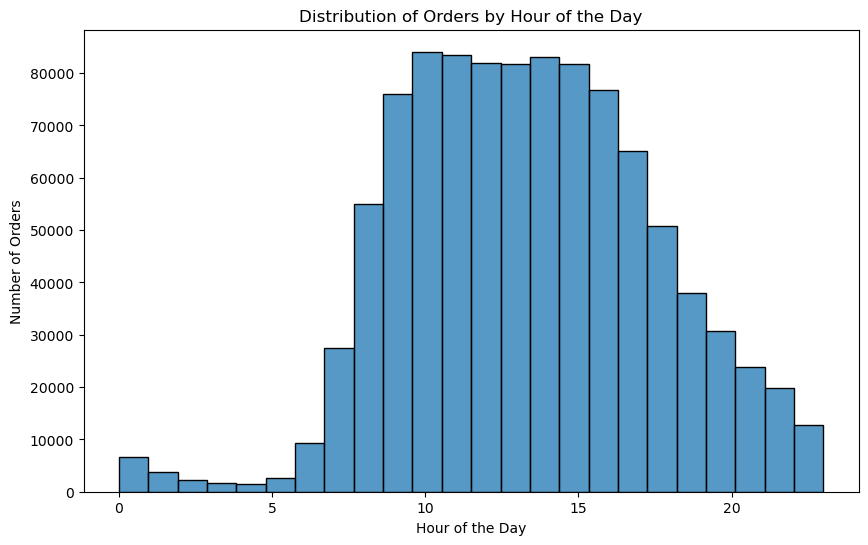

In [4]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a histogram of the 'order_hour_of_day' column
sns.histplot(df['order_hour_of_day'], bins=24, kde=False)

# Add titles and labels
plt.title('Distribution of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')

# Display the histogram
plt.show()

### Sales by Hour of the Day

The histogram above illustrates the distribution of orders placed at different hours of the day:

- The busiest hours for placing orders are between **10 AM and 3 PM**, with the peak aroun10*A12 PM** (noon), where the number of orders exceeds 80,000.
- The number of orders begins to rise significantly aft7r **8 AM** and continues to increase until around **noon**.
- There is a sharp decline in orders after **4 PM**, with relatively fewer orders placed in the late evening.
- The quietest period for orders is during the early morning hours, especially between **midnight** and **5 AM**, where the number of orders is minimal.

This pattern shows that Instacart's customer activity peaks around midday and steadily declines towards the evening. This data can help the team optimize resources, such as staff allocation and delivery scheduling, based on the times when customers are most active.


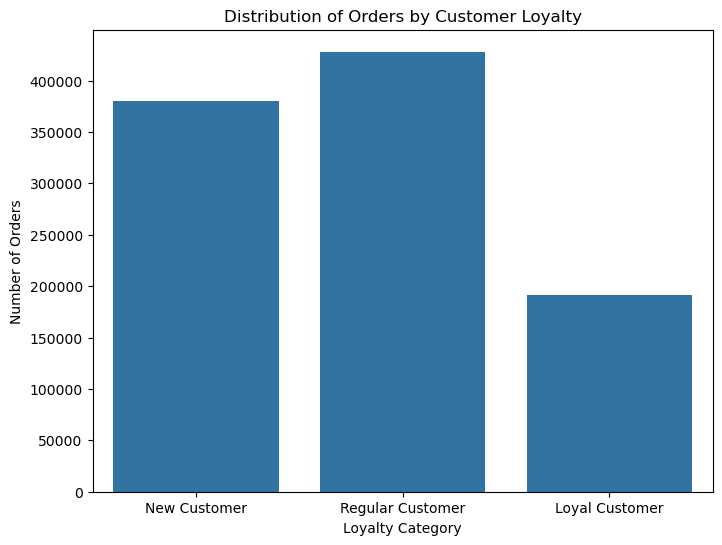

In [5]:
# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a bar chart to show the distribution of orders by 'loyalty_flag'
sns.countplot(x='loyalty_flag', data=df)

# Add titles and labels
plt.title('Distribution of Orders by Customer Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Orders')

# Display the bar chart
plt.show()

### Distribution of Orders by Customer Loyalty

The bar chart above provides insights into the distribution of orders based on customer loyalty categories:

- **Regular Customers** place the highest number of orders, indicating that they are a key segment of Instacart's customer base.
- **New Customers** also contribute a significant number of orders, suggesting that there is a healthy flow of new users engaging with the platform.
- **Loyal Customers** have the smallest share of orders, likely because they are already well-engaged with the platform and may place fewer, but larger, orders.

These insights can help the marketing team focus their efforts on customer retention strategies for New and Regular Customers while also engaging Loyal Customers with loyalty programs or exclusive offers.


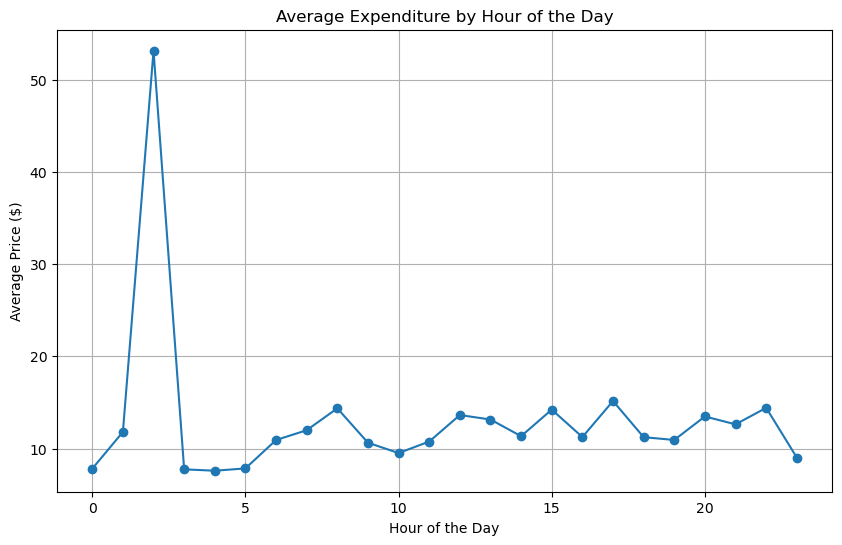

In [6]:
# Step 1: Group the data by 'order_hour_of_day' and calculate the average 'prices'
hourly_price_avg = df.groupby('order_hour_of_day')['prices'].mean()

# Step 2: Create a line chart to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(hourly_price_avg.index, hourly_price_avg.values, marker='o')

# Add titles and labels
plt.title('Average Expenditure by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price ($)')
plt.grid(True)

# Display the line chart
plt.show()

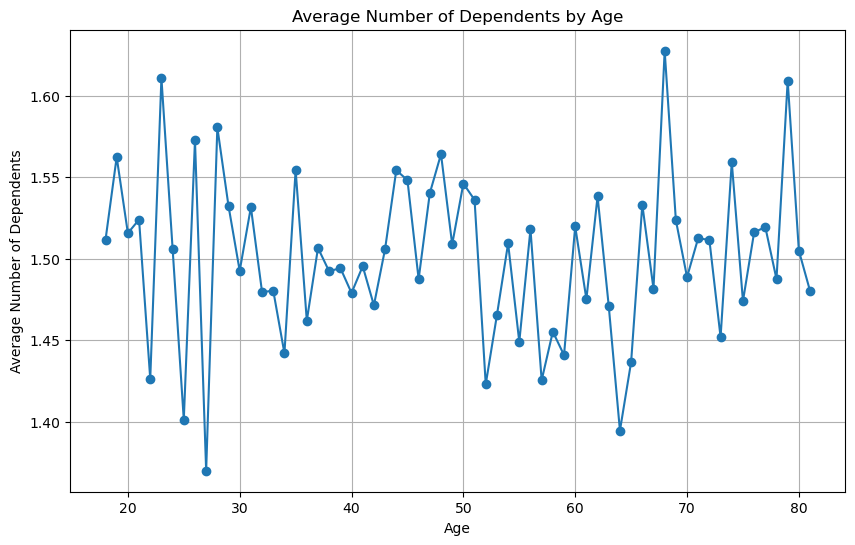

In [7]:
# Step 1: Group the data by 'age' and calculate the average number of dependents for each age group
age_dependents_avg = df.groupby('age')['num_dependants'].mean()

# Step 2: Create a line chart to visualize the relationship between age and number of dependents
plt.figure(figsize=(10, 6))
plt.plot(age_dependents_avg.index, age_dependents_avg.values, marker='o')

# Add titles and labels
plt.title('Average Number of Dependents by Age')
plt.xlabel('Age')
plt.ylabel('Average Number of Dependents')
plt.grid(True)

# Display the line chart
plt.show()

### Connection Between Age and Number of Dependents

The line chart displays the average number of dependents for customers across various age groups. Key observations include:

- **General Consistency**: Across most ages, the average number of dependents fluctuates between 1.4 and 1.6, indicating that customers, on average, tend to have about 1 to 2 dependents, regardless of age.
- **Spikes in Dependents**: There are notable spikes at certain ages, particularly around ages 25, 60, and 70. These spikes could be attributed to outliers or smaller sample sizes at these ages, leading to higher variability.
- **Variability**: There’s some level of variability in the number of dependents across all ages, but it remains fairly consistent in the range of 1.4 to 1.6 dependents.

While the chart shows a general trend, it might be useful to smooth out the data or analyze larger groupings (e.g., age bins) to get a clearer picture of how the number of dependents changes with age. This information can help target different age groups with family-related marketing capaigns.


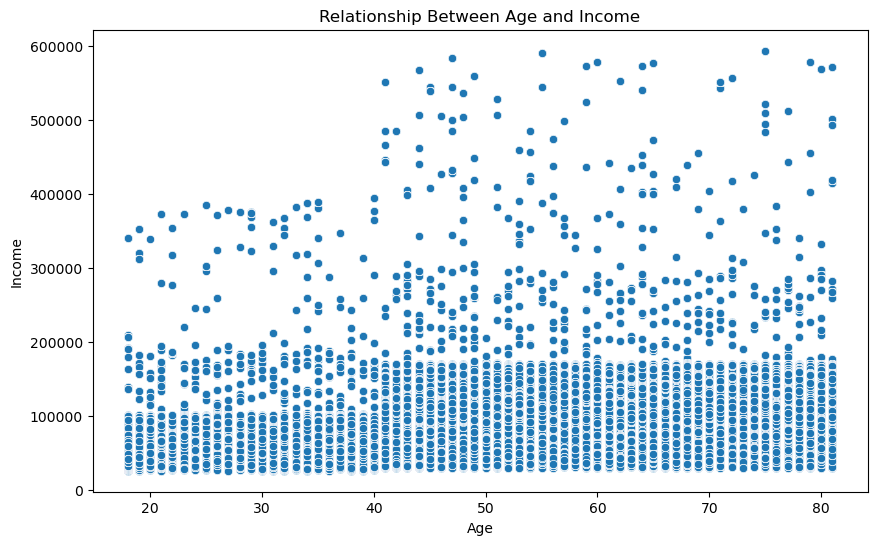

In [8]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a scatterplot for age vs. income
sns.scatterplot(x='age', y='income', data=df)

# Add titles and labels
plt.title('Relationship Between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')

# Display the scatterplot
plt.show()

### Relationship Between Age and Income

The scatterplot demonstrates the distribution of income across various age groups. Key insights include:

- **Wide Range of Incomes**: There is a broad range of income levels at almost every age, especially for customers in the 30 to 60 age group. This indicates that customers of the same age can have vastly different levels of spending power.
- **Higher Incomes Among Older Customers**: We observe a cluster of higher incomes (over $300,000) primarily in customers over 50, suggesting that older customers tend to have higher spending power.
- **Younger Customers**: The younger age group (under 30) generally has lower incomes, with most of them earning below $200,000.
- **General Trend**: Although the income spread is broad at every age, the scatterplot suggests that as age increases, there are more customers with higher incomes.

This information can help the marketing team focus their campaigns based on spending power, with older customers potentially having more disposable income for premium products and services.


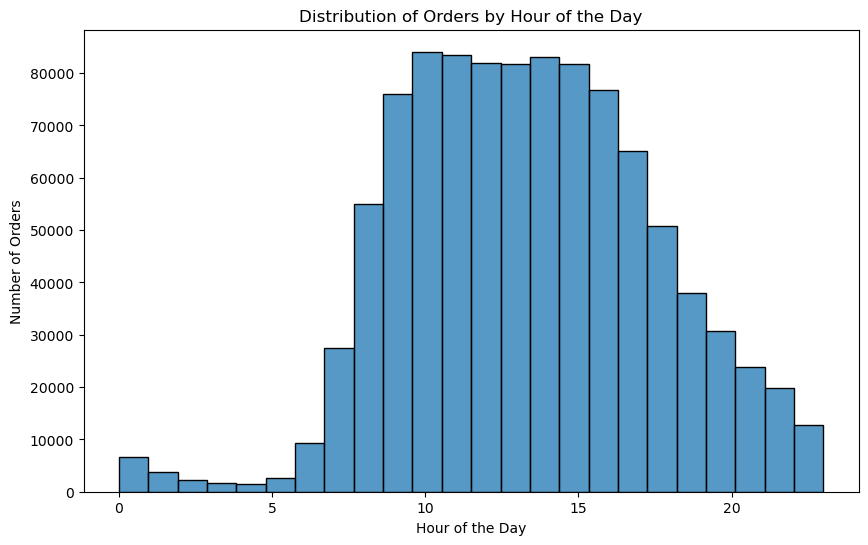

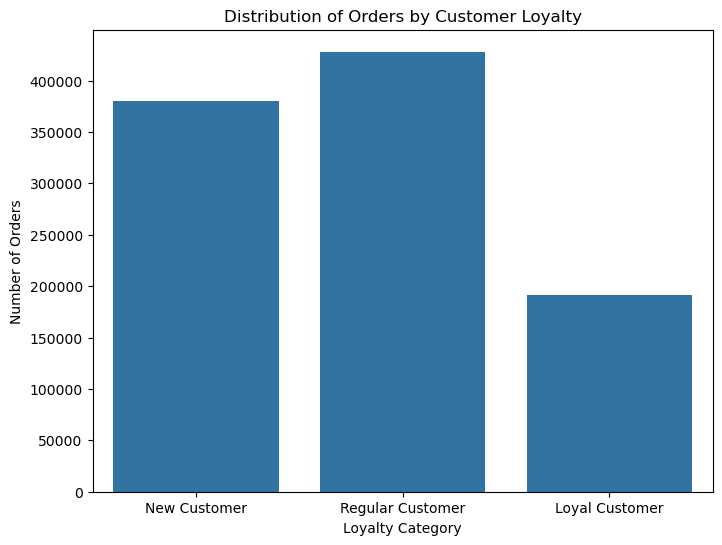

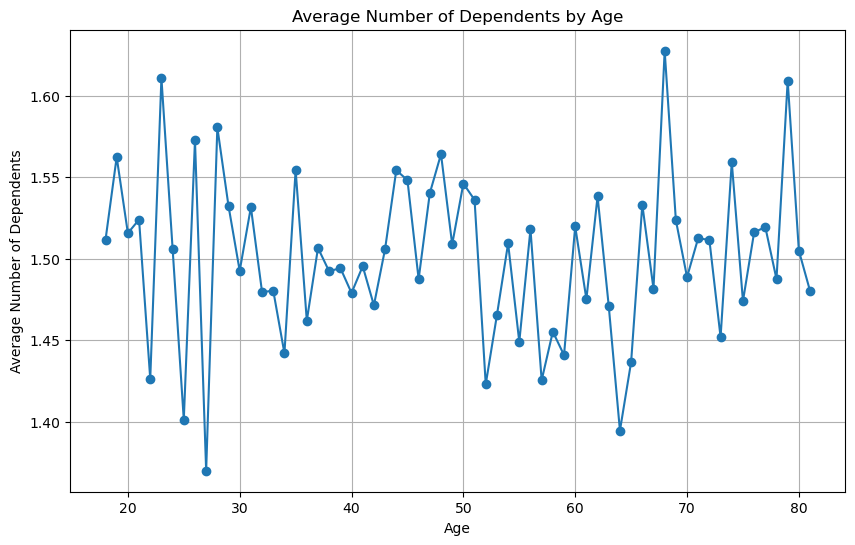

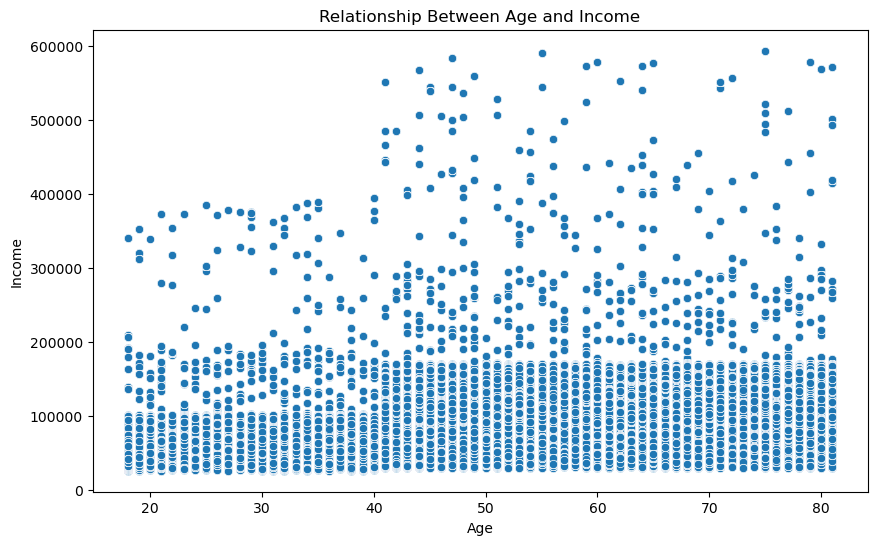

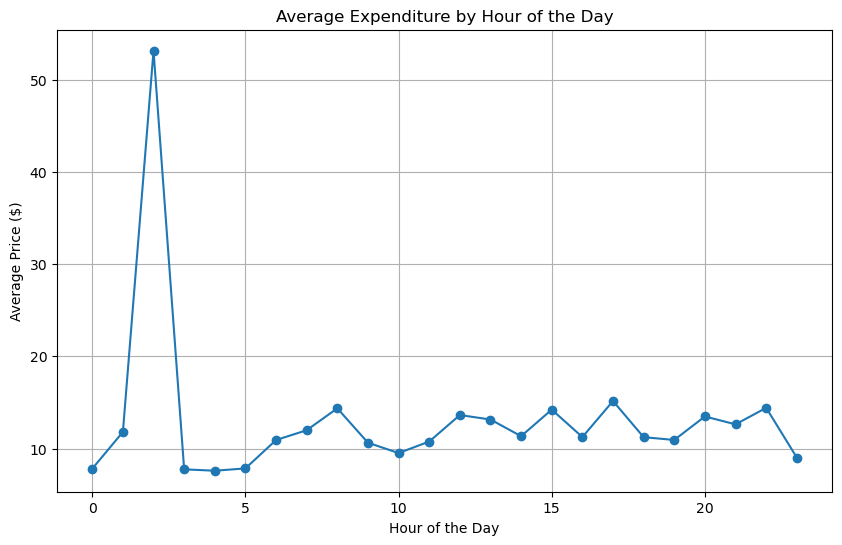

In [9]:
# Define the directory where the visualizations will be saved
visualization_folder = r'C:\Users\Jose Zambom\OneDrive - Exel Industries\Data Analysis\Data Analytics Immersion\Python Fundamentals for Data Analyst\csv file\Visualization'

# 1. Save the histogram (order_hour_of_day)
histogram_path = os.path.join(visualization_folder, 'histogram_order_hour_of_day.png')
plt.figure(figsize=(10, 6))
sns.histplot(df['order_hour_of_day'], bins=24, kde=False)
plt.title('Distribution of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.savefig(histogram_path)  # Save the histogram

# 2. Save the bar chart (loyalty_flag)
barchart_path = os.path.join(visualization_folder, 'bar_chart_loyalty_flag.png')
plt.figure(figsize=(8, 6))
sns.countplot(x='loyalty_flag', data=df)
plt.title('Distribution of Orders by Customer Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Orders')
plt.savefig(barchart_path)  # Save the bar chart

# 3. Save the line chart (age vs number of dependents)
linechart_path = os.path.join(visualization_folder, 'line_chart_age_vs_dependents.png')
plt.figure(figsize=(10, 6))
plt.plot(age_dependents_avg.index, age_dependents_avg.values, marker='o')
plt.title('Average Number of Dependents by Age')
plt.xlabel('Age')
plt.ylabel('Average Number of Dependents')
plt.grid(True)
plt.savefig(linechart_path)  # Save the line chart

# 4. Save the scatterplot (age vs income)
scatterplot_path = os.path.join(visualization_folder, 'scatterplot_age_vs_income.png')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', data=df)
plt.title('Relationship Between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.savefig(scatterplot_path)  # Save the scatterplot

# 5. Save the line chart (average price vs hour of the day)
linechart_price_path = os.path.join(visualization_folder, 'line_chart_avg_price_vs_hour.png')
plt.figure(figsize=(10, 6))
plt.plot(hourly_price_avg.index, hourly_price_avg.values, marker='o')
plt.title('Average Expenditure by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.savefig(linechart_price_path)  # Save the line chart for prices
